In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
try: 
    # Load dataset 
    df = pd.read_csv('samples.csv')
except FileNotFoundError :
    print("❌ File not found.")
    exit()

# Separate features (X) and target prices (Y)    
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1) 

# Apply the Normal Equation to compute regression weights
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# Validate user input format and value ranges
def validate_data(input_data , lenght = 5):
    try:
        input_list = list(map(float , input_data.split('-')))
        if(len(input_list) != lenght):
            print(f"❌ You must enter exactly {lenght} values.")
            return None
        if not(50 <= input_list[0] <= 250):
            print("❌ Size must be between 50 and 250 square meters.")
            return None
        if not(1 <= input_list[1] <= 5):
            print("❌ Number of bedrooms must be between 1 and 5.")
            return None
        if not(1995 <= input_list[2] <= 2025):
            print("❌ Year made must be between 1995 and 2025.")
            return None
        if not(1 <= input_list[3] <= 20):
            print("❌ Floor number must be between 1 and 20.")
            return None
        if not(1 <= input_list[4] <= 10):
            print("❌ Region code must be between 1 and 10.")
            return None
        return input_list
    except :
        print("❌ Invalid input: Please enter only numbers separated by '-' (e.g., 120-3-2010-5-2)")
        return None

print("\n Features : size - bedrooms - year made - floor - region \n")
print("Example: 120-3-2010-5-2\n")
while(True):
    InputData = input("Enter house features (or type exit enter 'e') : ")
    if(InputData.lower() == 'e'):
        print("Exiting.")
        break
    PredictList = validate_data(InputData)
    if PredictList is None:
        continue

    # Predict price using the calculated weights
    predict_price = int(np.dot(PredictList , w).item())
    print(f"the price of this house is: {predict_price:,}")



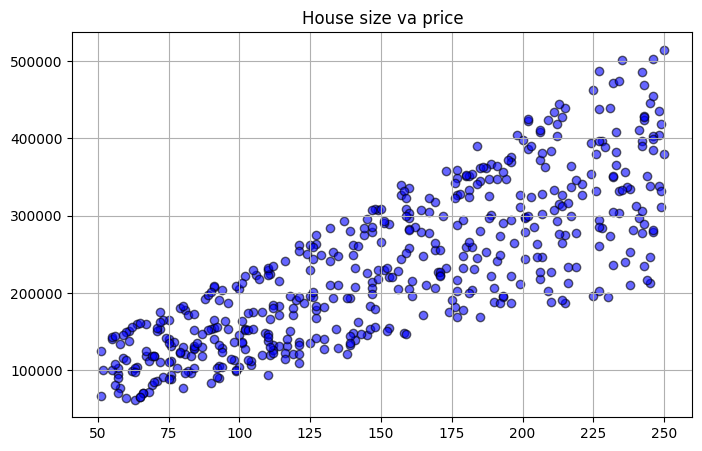

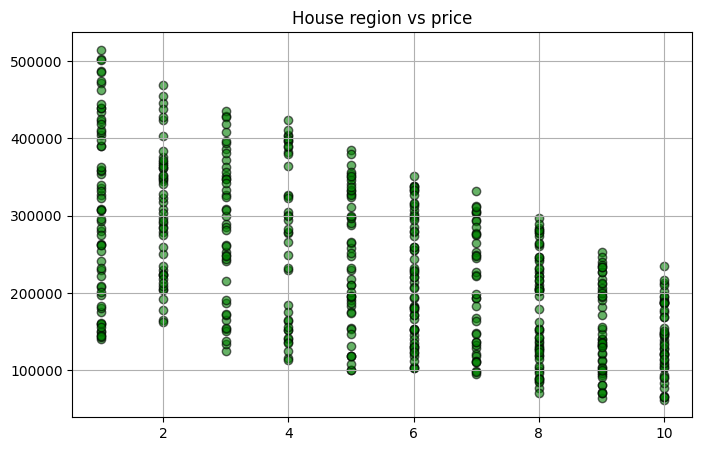

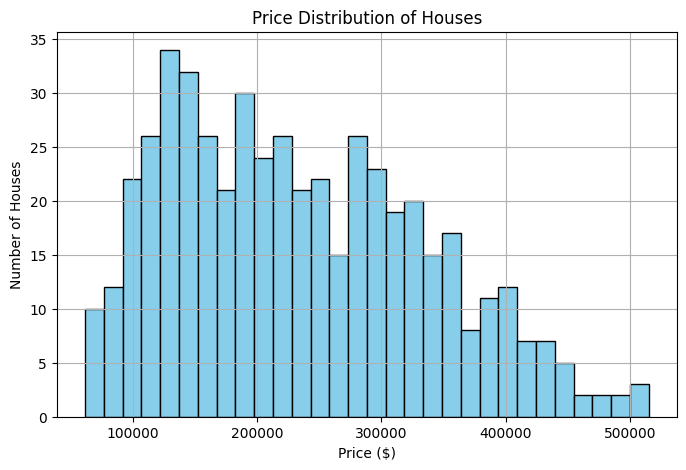

In [ ]:
sizes = X[:,0]
prices = Y.flatten()

# Visualize relationship between house size and price
plt.figure(figsize=(8,5))
plt.scatter(sizes , prices , c="blue" , alpha=0.6 , edgecolors='k')
plt.title("House size va price")
plt.grid(True)
plt.show()

# Visualize price distribution across regions
region = X[:,4]
plt.figure(figsize=(8,5))
plt.scatter(region , prices , c="green" , alpha=0.6 , edgecolors="k")
plt.title("House region vs price")
plt.grid(True)
plt.show()

# Show distribution of bedroom counts
plt.figure(figsize=(8, 5))
plt.hist(prices, bins=30, color="skyblue", edgecolor="black")
plt.title("Price Distribution of Houses")
plt.xlabel("Price ($)")
plt.ylabel("Number of Houses")
plt.grid(True)
plt.show()